There are three basic ways to make your Python code faster:
Improve its efficiency
Convert your code to parallelism (where appropriate)
Rewrite slow Python routines in a faster language

If you can't improve the efficiency of your Python code or make full use of parallelism (CPython's GIL may be the culprit here), then writing modules in a faster language may be the solution.

C is often the easiest language to integrate.

But why use C?

It's a statically typed  language unlike Python; variables cannot change type so there's no need to test to see what a variable is before its used.
It's compiled to native binary instructions (not compiled to bytecode and then interpreted like Python using a virtual machine) that executes on the CPU
Due to its compilation, its code can be fully optimised to the most efficient machine code instructions, saving precious clock cycles at execution time

Note. other languages such as C++ etc can be used.



C is a classic example of a faster language (many others exist)

Why use C?
C is statically typed
C is compiled to native binary instructions
C can be tightly optimised during compilation 
C syntax is familiar to anyone who has programmed in a "C family" language, e.g. C++, Java, C#, Perl, PHP, Objective-C, JavaScript and … Python (to a lesser extent)


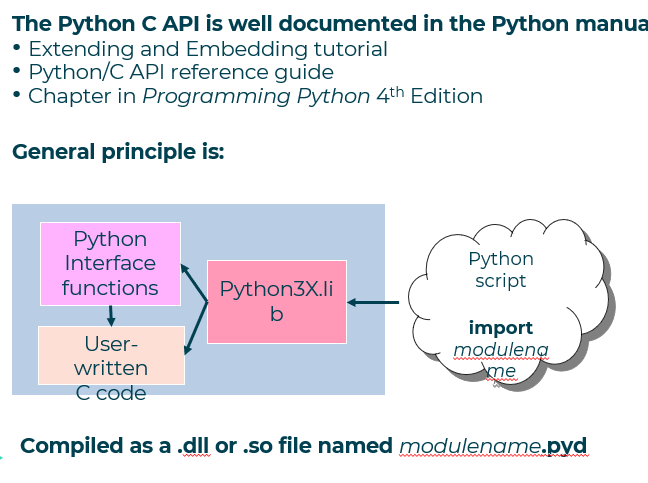

A Windows DLL or UNIX .so file is created as a .pyd file

In the C source code:
#include <Python.h>
Describe the module
Describe the C functions with their Python names
Create a module initialisation function

The simplest way to build is using distutils
Includes the correct directories and libraries

In the Python code just import the module as normal
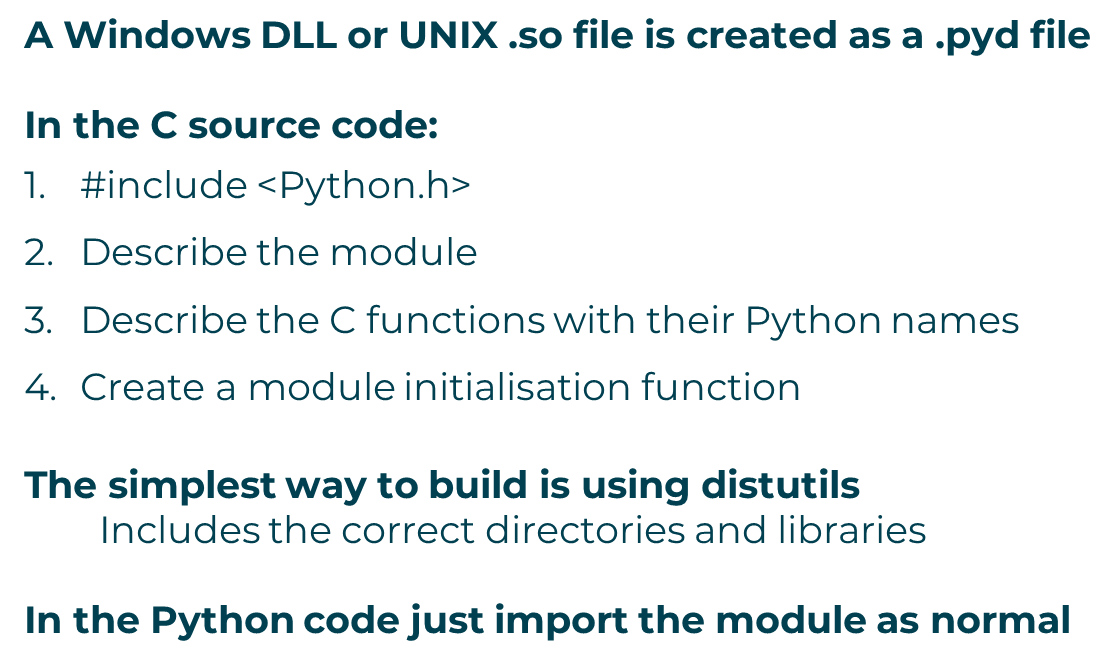

Creating a new module
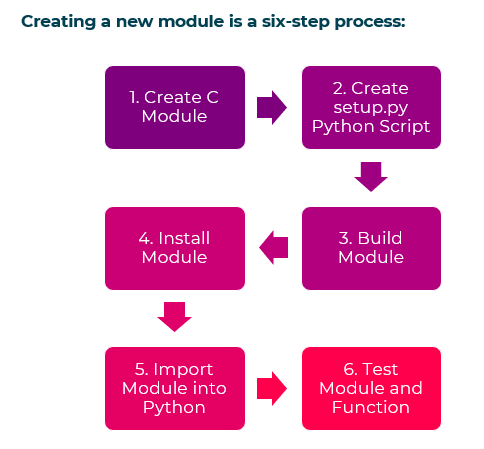

In [1]:
# c file 
#include <Python.h>


PyObject * Hello(PyObject *, PyObject *); # prototype

static PyMethodDef SimpleMethods[] = {
    {"Hello", Hello, METH_NOARGS, "Says Hello World!"},
    {NULL, NULL, 0, NULL}
}; # Method registration table


static struct PyModuleDef Simple_module = {
   PyModuleDef_HEAD_INIT,
   "Simple",   
   "Test Module",
   -1,       
   SimpleMethods
};

PyMODINIT_FUNC PyInit_Simple(void)
{
    return PyModule_Create(&Simple_module);
}

static PyObject * Hello(PyObject *self, PyObject *args)
{
    printf("Hello, World!\n");
    return Py_None;
}



SyntaxError: invalid syntax (Temp/ipykernel_52196/2702378238.py, line 5)

The above is a simple module called simple, you can see the PyModDef that describes the module.
And the name of the array of PyMethodDef structs that describes the methods 

In [ ]:
# setup.py file

from distutils.core import setup, Extension

my_module = Extension("simple", sources=['simple.c'])

setup(
    name="simple",
    version = "0.1dev",
    description = "This is a test package",
    author = "dev guy",
    url = "https://qa.com",
    ext_modules = [my_module])
